In [123]:
import re
from os import path
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageEnhance
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
from io import BytesIO
import datetime
import random
import wikipedia


stopwords = set(STOPWORDS)


def getcorpus_wiki(Title):
    soup = BeautifulSoup(wikipedia.WikipediaPage(title = Title).content, "html.parser")
    words = soup.get_text()
    words= re.sub("[^a-zA-Z' ]+", " ", words)
    return words

def getcorpus_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    words = soup.get_text()
    words= re.sub("[^a-zA-Z' ]+", " ", words)
    return words


def nebulize(text, imgloc, imgurl,maxsize ,
               maxwords, save, title, color, font, 
              figsize, fontsize):
    if imgloc == "local":
        mask = np.array(Image.open(imgurl))
    else:
        response1 = requests.get(imgurl)
        img = Image.open(BytesIO(response1.content))
        mask = np.array(img)
    wordcloud = WordCloud(font_path=r'C:\Windows\Fonts\\' +str(font)+'.ttf', stopwords = stopwords, background_color="white", max_words=maxwords,max_font_size=maxsize,  mask=mask, collocation_threshold=150).generate(text)
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[figsize,figsize])
    plt.title(title, size=fontsize)
    if color =="random":
        plt.imshow(wordcloud.recolor(color_func=random_color_func), interpolation="bilinear")
    elif color =="green":
        plt.imshow(wordcloud.recolor(color_func=green_func), interpolation="bilinear")
    elif color =="red":
        plt.imshow(wordcloud.recolor(color_func=red_func), interpolation="bilinear")
    elif color =="orange":
        plt.imshow(wordcloud.recolor(color_func=orange_func), interpolation="bilinear")
    elif color =="yellow":
        plt.imshow(wordcloud.recolor(color_func=yellow_func), interpolation="bilinear")
    elif color == "teal":
        plt.imshow(wordcloud.recolor(color_func=teal_func), interpolation="bilinear")
    elif color == "lightblue":
        plt.imshow(wordcloud.recolor(color_func=lightblue_func), interpolation="bilinear")
    elif color =='darkblue':
        plt.imshow(wordcloud.recolor(color_func=darkblue_func), interpolation="bilinear")
    elif color == "purple":
        plt.imshow(wordcloud.recolor(color_func=purple_func), interpolation="bilinear")
    elif color =="pink":
        plt.imshow(wordcloud.recolor(color_func=pink_func), interpolation="bilinear")
    else:
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    if save == "yes":
        plt.savefig("viz"+str(datetime.datetime.now().second)+str(datetime.datetime.now().minute)+".png", format="png")
    plt.show()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    
    plt.show()


In [25]:
def green_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(87, 154), random.randint(0, 100) ,random.randint(0, 92))


def random_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(0, 357), random.randint(0, 100) ,random.randint(0, 92))


def red_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(0, 6), random.randint(0, 100) ,random.randint(0, 92))




def orange_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(14, 38), random.randint(0, 100) ,random.randint(0, 92))




def yellow_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(39, 69), random.randint(0, 100) ,random.randint(0, 92))


def teal_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(147, 180), random.randint(0, 100) ,random.randint(0, 92))


def lightblue_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(180, 200), random.randint(0, 100) ,random.randint(0, 92))


def darkblue_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(208, 250), random.randint(0, 100) ,random.randint(0, 92))




def purple_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(256, 283), random.randint(0, 100) ,random.randint(0, 92))


def pink_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(293, 341), random.randint(0, 100) ,random.randint(0, 92))



In [3]:
br = getcorpus_wiki('Blade Runner')

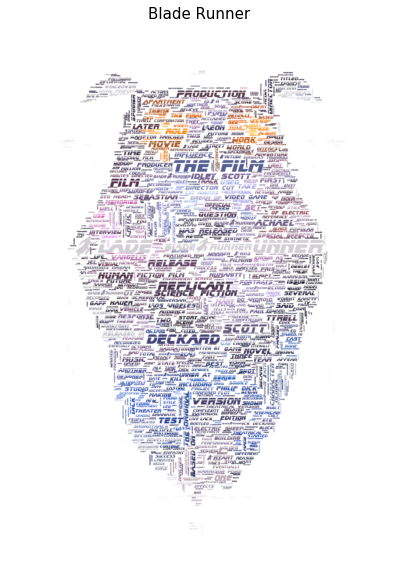

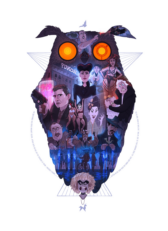

In [49]:
nebulize(br, "url", 
            "https://cdna.artstation.com/p/assets/images/images/013/249/636/large/paul-tinker-bladerunner.jpg?1538740659",
           500, 7000, "yes", "Blade Runner", "image", "BLADRMF", 10, 15 )

In [8]:
blade = getcorpus_url("https://www.dailyscript.com/scripts/blade-runner_shooting.html")
blade

" Blade Runner script by Hampton Fancher   David Peoples                                 BLADE RUNNER                                Screenplay by                               HAMPTON FANCHER                                     and                                DAVID PEOPLES         February            NOTE  THE HARD COPY OF THIS SCRIPT CONTAINED SCENE NUMBERS         AND SOME  SCENE OMITTED  SLUGS  THEY HAVE BEEN REMOVED FOR         THIS SOFT COPY         android  an'droid  adj   Possessing human features   n                 A synthetic man created from biological materials                 Also called humanoid    Late Greek androeides                 manlike   ANDR O    OID                                         THE AMERICAN HERITAGE                                         DICTIONARY OF THE ENGLISH                                         LANGUAGE           android  an'droid  n  Gk  humanoid automation  more at                 robot    early version utilized for work too            

In [ ]:
blade = remove_tuples(blade)

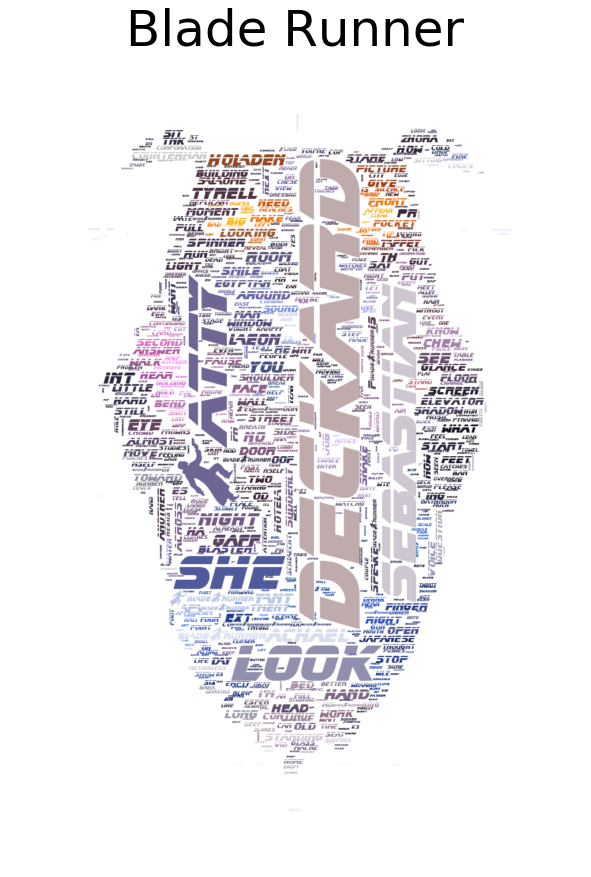

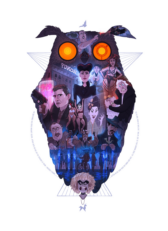

In [124]:


nebulize(blade, "url", 
            "https://cdna.artstation.com/p/assets/images/images/013/249/636/large/paul-tinker-bladerunner.jpg?1538740659",
           150, 7000, "yes", "Blade Runner", "image", "BLADRMF", 15, 50 )

In [215]:


def remove_tuples(df):
    df=df.replace('CUT TO', '')
    df=df.replace(' He ', '')
    df=df.replace('TO INT', '')
    df=df.replace(' go ', '')
    df=df.replace(' turn', '')
    df=df.replace(' goes', '')
    df=df.replace(' is ', '')
    df=df.replace(' hi ', '')
    df=df.replace(' what ', '')
    df=df.replace(' one ', '')
    df=df.replace(' take ', '')
    df=df.replace(' come ', '')
    df=df.replace(' way ', '')
    df=df.replace(' you ', '')
    df=df.replace(' TO EXT ', '')
    df=df.replace(' back ', '')
    df=df.replace(' tng ', '')
    df=df.replace(' wch ', '')
    df=df.replace('EXT  SPACE', '')
    df=df.replace(' THE DEATH ', '')
    df=df.replace(' INT ', '')
    df=df.replace(' toward the ', '')
    df=df.replace(' look ', '')
    df=df.replace(' robot ', '')
    df=df.replace(' going to ', '')
    df=df.replace(' pirateship ', '')
    df=df.replace(' the rebel ', '')
    df=df.replace(' wing ', '')
    df=df.replace(' fighter ', '')
    df=df.replace(' begins to ', '')
    df=df.replace(' his head ', '')
    df=df.replace(' turn ', '')
    df=df.replace(' luke look ', '')
    df=df.replace(' move ', '')
    df=df.replace(' the Death star ', ' death star ')
    df=df.replace(' over speaker ', '')
    df=df.replace(' over headset ', '')
    df=df.replace("'ve", ' ')

    return df


In [130]:
stopwords.add('us')
stopwords.add('let')
stopwords.add('one')

stopwords.add('now')
stopwords.add('away')
stopwords.add('stop')
stopwords.add('the')

In [170]:
def getcorpus_local(local):
    with open(str(local)+'.txt') as f:
        soup = BeautifulSoup(f, "html.parser")
        words = soup.get_text()
        words= re.sub("[^a-zA-Z' ]+", " ", words)
        return words



In [216]:
ANH = getcorpus_local('A New Hope only dialogue')

#with a local reformatted file


ANH2= re.sub(r'\b[A-Z]+\b', '', ANH)
ANH2 = remove_tuples(ANH2)
ANH2= ANH2.lower()


ANHlist = ['death star', 'ben', 'luke', 'han', 'artoo', 
             'threepio', 'chewbacca', 'leia', 'ship', 'vader', 'star', 'kenobe']

for word in ANHlist:
    ANH2= ANH2.replace(word, word.capitalize()) 
    


In [234]:
stopwords.add('no')
stopwords.add('see')
stopwords.add('camera')
stopwords.add('look')
stopwords.add('left')
stopwords.add('right')
stopwords.add('around')
stopwords.add('toward')
stopwords.add('over')
stopwords.add('behind')

stopwords.add('You')
stopwords.add('What')
stopwords.add('Got')
stopwords.add('got')
stopwords.add('Sir')
stopwords.add('Look')
stopwords.add("We're")
stopwords.add('oh')
stopwords.add('going')
stopwords.add("'ve")
stopwords.add("will")
stopwords.add("well")

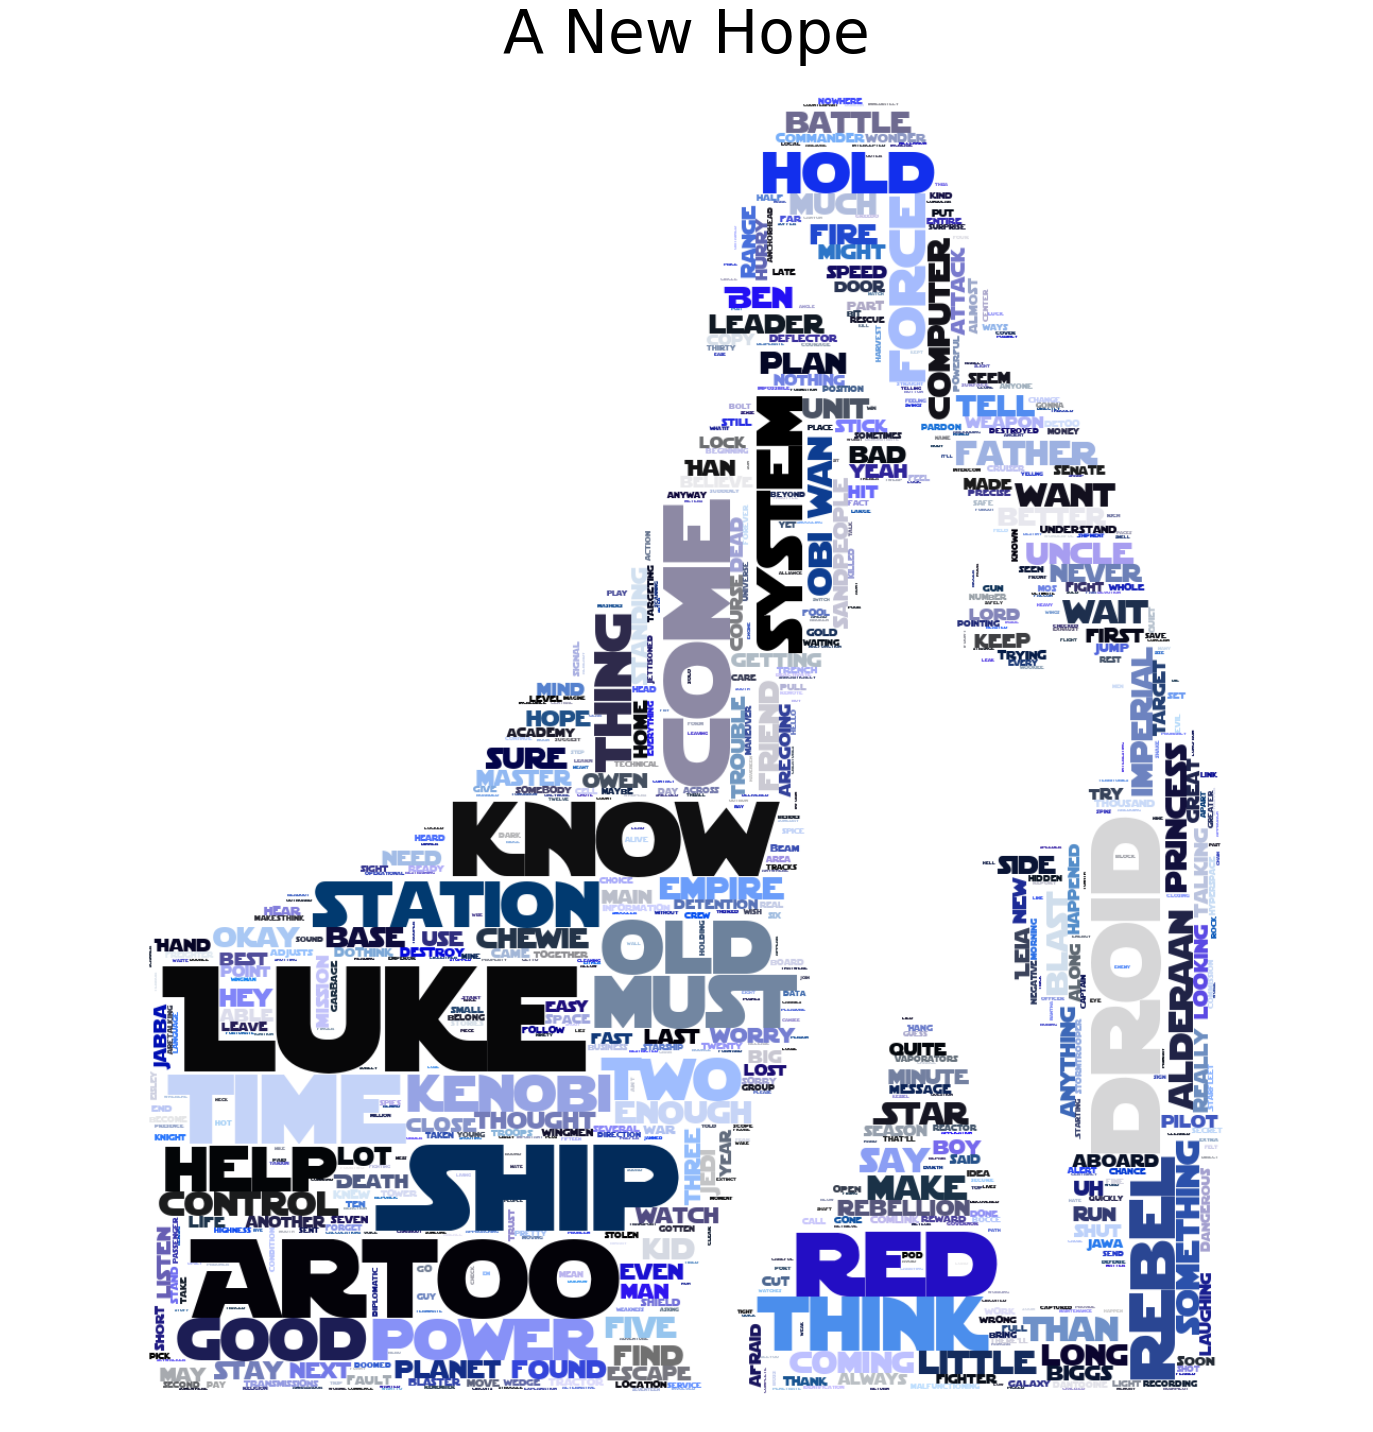

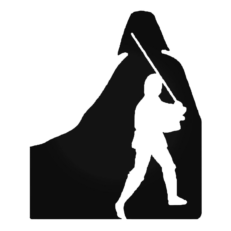

In [267]:

nebulize(ANH2, "url", 
"https://cdn11.bigcommerce.com/s-sq9zkarfah/images/stencil/1280x1280/products/74158/135826/Star-Wars-Luke-Inside-Vader-Decal-Sticker__71000.1510890365.jpg?c=2&imbypass=on",        
        140, 70000, "yes", "A New Hope", "darkblue", "STJEDISE", 25, 60 )

In [133]:
 # https://i.pinimg.com/originals/b4/2d/f1/b42df1c116fe02e58af7d0767fa8cd0e.jpg
    
    #https://i.pinimg.com/originals/a5/94/47/a594479989de48b248e58c284c5acf64.jpg

In [235]:



ESB = getcorpus_local("Empire Strikes Back")
ESB2= re.sub(r'\b[A-Z]+\b', '', ESB)
ESB2 = remove_tuples(ESB2)
ESB2= ESB2.lower()
ESB2

"    episode       after the destruction of its most feared battle station  the empire has declared martial law throughout the galaxy  million worlds have felt the oppressive hand of the emperor asattempts to crush the growing rebellion as the imperial grip of tyranny tightens  princess leia and the small band of freedom fighters search for a more secure base of operations                                  to the tauntaun easy girl  it's just another meteorite into com link han   han ol' buddy  doread me     filtered loud and clear  kid   what's up     finished my circle and  haven't picked up any life read ings   filtered there isn't enough life on this ice cube to fill a space cruiser my sentry markers are placed 'm headingto the base   'll seeshortly  meteorite just hit the ground near here and  want to check it out   won't be long         weeho  girl   what's the matter smell something   there's nothing out there   'll check again         son of a jumping                            

In [242]:

stopwords.add('Yes')
stopwords.add('yes')
stopwords.add('Hi')
stopwords.add('hi')
stopwords.add("'m'")
stopwords.add("I'm")
stopwords.add("ll")




In [243]:



ESBlist= ['death star', 'ben', 'luke', 'han', 'artoo', 
             'threepio', 'chewbacca', 'leia', 'ship', 'vader', 'chewie', 'star', 'walker', 'speeder']

for word in ESBlist:
    ESB2= ESB2.replace(word, word.capitalize()) 

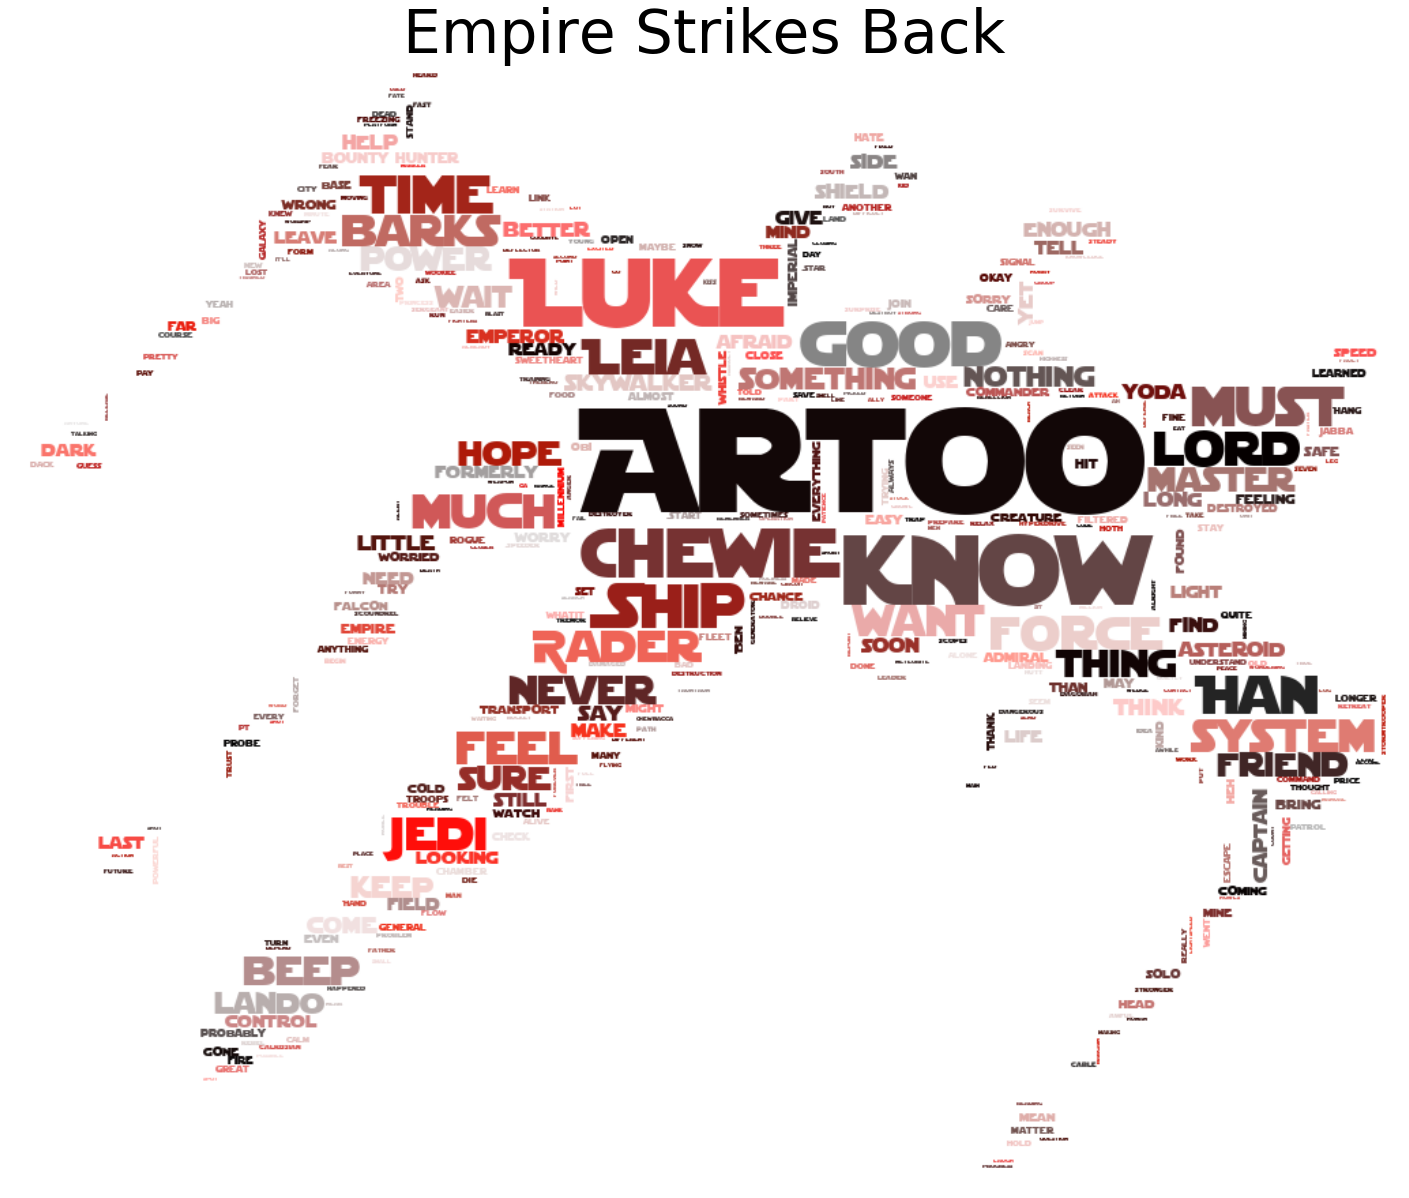

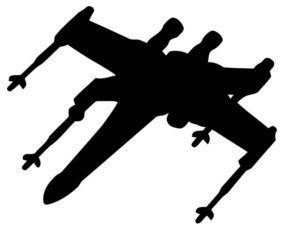

In [265]:
nebulize(ESB2, "url", 
"https://cdn.shopify.com/s/files/1/0941/8552/products/Star-Wars---X-Wing-Fighter-_Converted_1024x1024.jpg?v=1494978861",
   120, 70000, "yes", "Empire Strikes Back", "red", "STJEDISE", 25, 60 )

In [245]:
RTJ = getcorpus_local('Return of the Jedi')



RTJ2= re.sub(r'\b[A-Z]+\b', '', RTJ)
RTJ2 = remove_tuples(RTJ2)
RTJ2= RTJ2.lower()


RTJlist = ['death star', 'ben', 'luke', 'han', 'artoo', 
             'threepio', 'chewbacca', 'leia', 'ship', 'vader', 'star', 'kenobe']

for word in RTJlist:
    RTJ2= RTJ2.replace(word, word.capitalize())                                      

In [251]:
stopwords.add("wa")


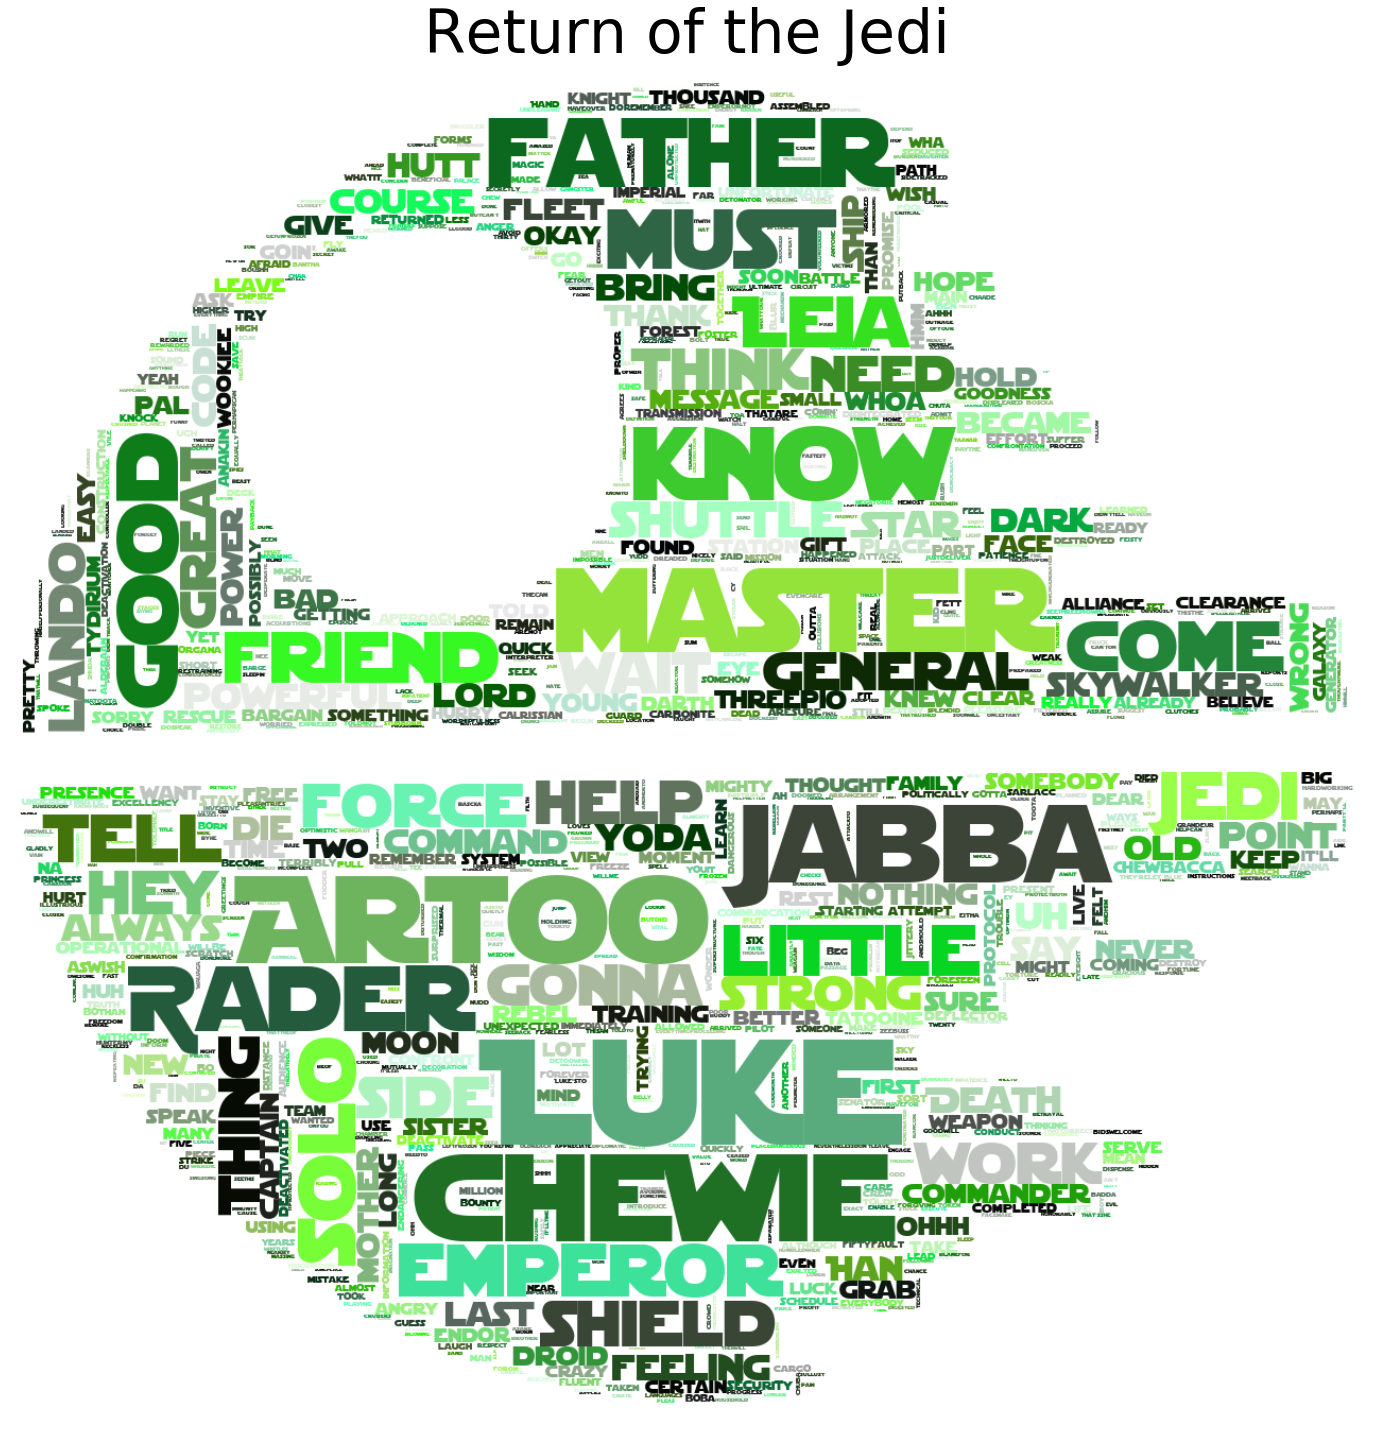

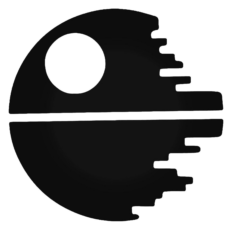

In [268]:

nebulize(RTJ2, "url", 
    "https://cdn11.bigcommerce.com/s-sq9zkarfah/images/stencil/1280x1280/products/113680/201754/Death-Star-Star-Wars-Sticker__49245.1511162998.jpg?c=2&imbypass=on",
         140, 70000, "yes", "Return of the Jedi", "green", "STJEDISE", 25, 60 )

In [270]:
import itertools
import cv2
import os
import numpy as np

#User defined variables
name = "Star Wars Trilogy" + ".jpg" 
margin = 20 #Margin between pictures in pixels
w = 3 # Width of the matrix (nb of images)
h = 1 # Height of the matrix (nb of images)
n = w*h

filename_list =  ['viz3741.png', 'viz4139.png', 'viz443.png' ]





imgs = [cv2.imread(os.getcwd()+"/"+file) for file in filename_list]

#Define the shape of the image to be replicated 
#(all images should have the same shape)
img_h, img_w, img_c = imgs[0].shape

#Define the margins in x and y directions
m_x = margin
m_y = margin

#Size of the full size image
mat_x = img_w * w + m_x * (w - 1)
mat_y = img_h * h + m_y * (h - 1)

#Create a matrix of zeros of the right size and fill with 255 (so margins end up white)
imgmatrix = np.zeros((mat_y, mat_x, img_c),np.uint8)
imgmatrix.fill(255)

#Prepare an iterable with the right dimensions
positions = itertools.product(range(h), range(w))

for (y_i, x_i), img in zip(positions, imgs):
    x = x_i * (img_w + m_x)
    y = y_i * (img_h + m_y)
    imgmatrix[y:y+img_h, x:x+img_w, :] = img

resized = cv2.resize(imgmatrix, (mat_x,mat_y), interpolation = cv2.INTER_AREA)
compression_params = [cv2.IMWRITE_JPEG_QUALITY, 100]
cv2.imwrite(name, resized, compression_params)

True